In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('./..')

sys.path.append('./../gp_sinkhorn/')
from SDE_solver import solve_sde_RK
from MLE_drift import *
import torch

from celluloid import Camera
from IPython.display import HTML
import math

In [2]:
data,data_cut,cutting_time= pickle.load(open("./../assets/motion_data.pkl","rb"))

In [3]:
d = []
for k in data_cut.keys():
    for i in data_cut[k].keys():
        d.append(data_cut[k][i])

In [4]:
dt = 0.1
N = int(math.ceil(1.0/dt))


# subsample the trajectory so they all have the same shape and we can use them as prior for MLEDrift
prior_Xts = torch.tensor([np.concatenate((i[::int(i.shape[0]/N),:][:(N),:],i[-1,:].reshape((1,-1))),axis=0) for i in d])
print(prior_Xts.shape)
data_concat = prior_Xts.reshape((-1,6))
mean = data_concat.mean(axis=0)
std = data_concat.std(axis=0)

X_0 = torch.Tensor([i[0,:] for i in d])
X_1 = torch.Tensor([i[-1,:] for i in d])
prior_Xts = (prior_Xts-mean)/std

X_0 = prior_Xts[:,0,:]
X_1 = prior_Xts[:,-1,:]

torch.Size([14, 11, 6])


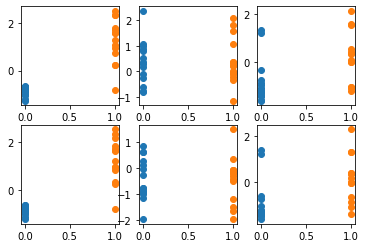

In [5]:

for i in range(X_0.shape[1]):
    plt.subplot(2,3,i+1)
    plt.scatter([0]*X_0.shape[0],X_0[:,i])
    plt.scatter([1]*X_0.shape[0],X_1[:,i])
plt.show()

In [9]:

prior_drift = None

result = MLE_IPFP(
    X_0,X_1,N=100,sigma=0.2,
    prior_drift=prior_drift,#prior_Xts=prior_Xts,
    prior_X_0=None, iteration=10, refinement_iterations=0,
    decay_sigma=1, gp_mean_prior_flag=True
)


100%|██████████| 10/10 [00:13<00:00,  1.33s/it]


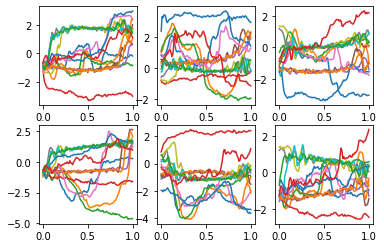

In [10]:
M = result[-1][1]
for n in range(6):
    plt.subplot(2,3,n+1)
    for i in range(M.shape[0]):
        plt.plot(M[i,:,-1],M[i,:,n])
    

In [8]:
prior_Xts.shape

torch.Size([14, 11, 6])